In [1]:
import pandas as pd
import numpy as np

from scipy import stats
from scipy.stats import uniform
from sympy import *
from scipy.stats import rv_continuous

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objects as go


pd.options.display.float_format = '{:,.4f}'.format

import warnings
warnings.filterwarnings("ignore")

from typing import Tuple

%matplotlib inline

## Задача 1

Имеются выборочные данные о числе сделок, заключенных фирмой с частными лицами в
течение месяца:

| число заключенных сделок | 0-10 | 10-20 | 20-30 | 30-40 | 40-50 |
| --- | --- | --- | --- | --- | --- |
| число частных лиц | 23 | 24 | 11 | 9 | 3 |

Проверить при уровне значимости $α=0,05$, используя критерий согласия Колмогорова,
гипотезу о нормальном законе распределения. 

In [38]:
# в итнервалах берем конечные значения 

df = pd.DataFrame({'x_i':np.arange(10, 60, 10), 'n_i':[23, 24, 11, 9, 3]})

df

,x_i,n_i
0,10,23
1,20,24
2,30,11
3,40,9
4,50,3


#### Рассчет вручную для $\mu = 17.143, \sigma=11.659$

In [39]:
df['w_i'] = df['n_i'] / df['n_i'].sum()
df['cumsum'] = df['w_i'].cumsum()
df['norm_cdf'] = stats.norm(loc=17.143, scale=11.659).cdf(df['x_i'])
df['diff'] = abs(df['cumsum'] - df['norm_cdf'])

df

,x_i,n_i,w_i,cumsum,norm_cdf,diff
0,10,23,0.3286,0.3286,0.2701,0.0585
1,20,24,0.3429,0.6714,0.5968,0.0746
2,30,11,0.1571,0.8286,0.8649,0.0364
3,40,9,0.1286,0.9571,0.9750,0.0179
4,50,3,0.0429,1.0000,0.9976,0.0024


In [41]:
df['diff'].max() * np.sqrt(70)

0.6244720837900759

#### Рассчет вручную для $\mu = 10, \sigma=4$

In [42]:
df['w_i'] = df['n_i'] / df['n_i'].sum()
df['cumsum'] = df['w_i'].cumsum()
df['norm_cdf'] = stats.norm(loc=10, scale=4).cdf(df['x_i'])
df['diff'] = abs(df['cumsum'] - df['norm_cdf'])

df

,x_i,n_i,w_i,cumsum,norm_cdf,diff
0,10,23,0.3286,0.3286,0.5000,0.1714
1,20,24,0.3429,0.6714,0.9938,0.3224
2,30,11,0.1571,0.8286,1.0000,0.1714
3,40,9,0.1286,0.9571,1.0000,0.0429
4,50,3,0.0429,1.0000,1.0000,0.0000


In [25]:
df['diff'].max() * np.sqrt(70)

2.697072013906789

## Рассчитываем через пакет stats

In [35]:
df['unstuck'] = df.apply(lambda row: list([row["x_i"]]) * int(row["n_i"]), axis=1)

df_unstuck = df[['unstuck']]

df_unstuck = df_unstuck.explode('unstuck')

df_unstuck['unstuck'] = df_unstuck['unstuck'].apply(lambda x: int(x))



#### Рассчет вручную для $\mu = 17.143, \sigma=11.659$

In [46]:
stats.kstest(df_unstuck.unstuck, stats.norm.cdf, args=(17.143, 11.659))

KstestResult(statistic=0.27005067155073403, pvalue=5.333109091236011e-05)

#### Рассчет вручную для $\mu = 10, \sigma=4$

In [47]:
stats.kstest(df_unstuck.unstuck, stats.norm.cdf, args=(10, 4))

KstestResult(statistic=0.6652189061027953, pvalue=5.177197380607878e-31)

## Задача 2

Используя критерий Колмогорова, проверить на уровне значимости **10%** гипотезу о том, что выборка

$0,90; 0,56; 0,05; 0,21; 0,97; 0,80; 0,04; 0,12; 0,73; 0,49$

является выборкой наблюдений равномерно распределённой случайной величины $X \thicksim R(0, 1)$.

In [8]:
sample = [0.9, 0.56, 0.05, 0.21, 0.97, 0.8, 0.04, 0.12, 0.73, 0.49]

#### Рассчет вручную 

In [43]:
sample.sort()

In [44]:
df = pd.DataFrame({'x_i':sample, 'n_i':[1]*len(sample)})
df['w_i'] = df['n_i'] / df['n_i'].sum()
df['cumsum'] = df['w_i'].cumsum()
df['uniform_cdf'] = stats.uniform(loc=0, scale=1).cdf(df['x_i'])
df['diff'] = abs(df['cumsum'] - df['uniform_cdf'])

T = df['diff'].max() * np.sqrt(len(sample))
z_0_9 =1.23

print(df['diff'].max())
print(T)
if T < z_0_9:
    print(f'T < {z_0_9}, следовательно'
          f' не можем отвергнуть гипотезу, что данная выборка могла быть получена из равномерного распределения R(0, 1)')
else:
    print(f'T > {z_0_9}, следовательно'
          f' можем отвергнуть гипотезу, что данная выборка могла быть получена из равномерного распределения R(0, 1)')

0.19000000000000003
0.6008327554319922
T < 1.23, следовательно не можем отвергнуть гипотезу, что данная выборка могла быть получена из равномерного распределения R(0, 1)


In [45]:
df

,x_i,n_i,w_i,cumsum,uniform_cdf,diff
0,0.0400,1,0.1000,0.1000,0.0400,0.0600
1,0.0500,1,0.1000,0.2000,0.0500,0.1500
2,0.1200,1,0.1000,0.3000,0.1200,0.1800
3,0.2100,1,0.1000,0.4000,0.2100,0.1900
4,0.4900,1,0.1000,0.5000,0.4900,0.0100
5,0.5600,1,0.1000,0.6000,0.5600,0.0400
6,0.7300,1,0.1000,0.7000,0.7300,0.0300
7,0.8000,1,0.1000,0.8000,0.8000,0.0000
8,0.9000,1,0.1000,0.9000,0.9000,0.0000
9,0.9700,1,0.1000,1.0000,0.9700,0.0300


<AxesSubplot:ylabel='Proportion'>

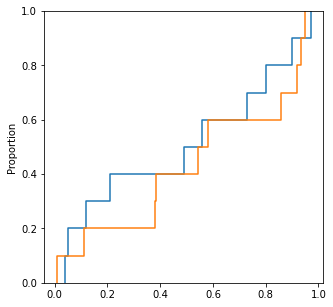

In [36]:
rng = np.random.default_rng(153)

fig, ax = plt.subplots(1, 1, figsize=[5, 5])
sns.ecdfplot(data=sample)
sns.ecdfplot(data=stats.uniform.rvs(size=10, loc=0, scale=1, random_state=rng))

#### Рассчет с помощью stats.kstest

In [55]:
stats.kstest(sample, 'uniform', args=(0, 1))

KstestResult(statistic=0.19000000000000003, pvalue=0.7994599807966073)

In [473]:
rng = np.random.default_rng(101)

uniform_sample = stats.uniform.rvs(size=1000, loc=0, scale=1, random_state=rng)
stats.kstest(sample, uniform_sample)

KstestResult(statistic=0.189, pvalue=0.8103582156913072)

In [502]:
D, p_value = stats.kstest(sample, 'uniform')
a = 0.1


print(f'Статистика: {D}, p-value: {p_value}')
if p_value > a:
    print(f'p_value > \N{GREEK SMALL LETTER ALPHA}, следовательно'
          f' не можем отвергнуть гипотезу, что данная выборка могла быть получена из равномерного распределения R(0, 1)')
else:
    print(f'p_value < \N{GREEK SMALL LETTER ALPHA}, следовательно'
          f' можем отвергнуть гипотезу, что данная выборка могла быть получена из равномерного распределения R(0, 1)')

Статистика: 0.19000000000000003, p-value: 0.7994599807966073
p_value > α, следовательно не можем отвергнуть гипотезу, что данная выборка могла быть получена из равномерного распределения R(0, 1)
